In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [5]:
#Load the data set
claimants = pd.read_csv("Session27_data/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


> casenum is the case number of the insurance case

> attorny means whether a person has hired a lawyer or not

> clmsex is gender 0 for female and 1 for male

> seatbelt is whether a peason wore seatbelt or not at the crush site

> clmage

In [6]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [7]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [8]:
#Shape of the data set
claimants.shape

(1340, 6)

In [9]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [10]:
Y = claimants.iloc[:,0]

In [11]:
#  Dependent variable
Y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [12]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]

# Independent variables
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [13]:
A = claimants.iloc[:, 0]
B = claimants.iloc[:, 1]
C = claimants.iloc[:, 2]

In [14]:
dataFrame = pd.DataFrame({"Claimant Sex" : A, "Claimant Sur" : B, "Claimant SeatBelt" : C})

In [15]:
dataFrame

,Claimant Sex,Claimant Sur,Claimant SeatBelt
0,0,0.0,1.0
1,1,1.0,0.0
2,1,0.0,1.0
3,0,0.0,1.0
4,1,0.0,1.0
...,...,...,...
1334,1,1.0,1.0
1336,0,1.0,1.0
1337,1,1.0,1.0
1338,0,1.0,0.0


In [16]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [17]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [18]:
y_pred_df = pd.DataFrame(y_pred)

In [19]:
type(y_pred_df)

pandas.core.frame.DataFrame

In [20]:
y_pred_df

,0
0,0
1,1
2,1
3,0
4,1
...,...
1091,1
1092,0
1093,1
1094,0


In [21]:
y_pred_df1= pd.DataFrame({'Actual_Values': Y,
                         'Predicted_Values': y_pred})

In [22]:
from IPython.core.display import HTML

In [23]:
HTML(y_pred_df1.to_html())

,Actual_Values,Predicted_Values
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,0,1
6,0,0
7,0,0
8,1,1
10,0,0


In [24]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [25]:
round(((381+395)/(381+197+123+395))*100, 3)

70.803

In [26]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



# ROC Curve

Text(0, 0.5, 'True Positive Rate')

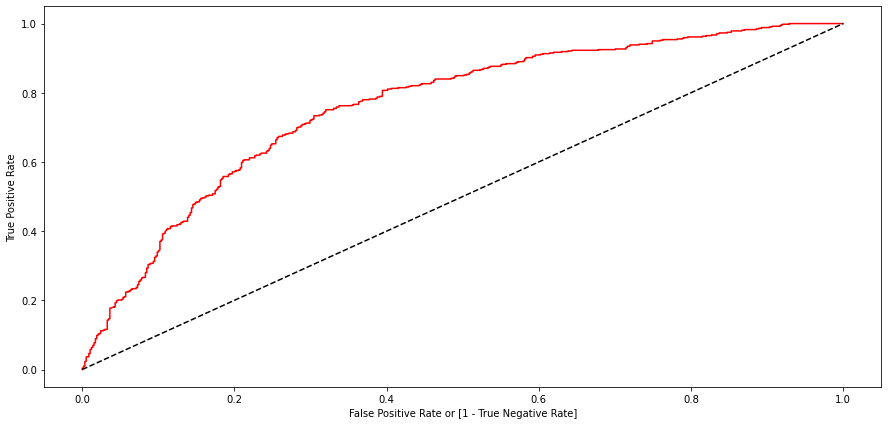

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 7))
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [28]:
auc

0.7108589063606365